x_n		(Du bao cho x)		(Hieu chinh cho x)		(Du bao cho y)		(Hieu chinh cho y)
3.0 		 nan 		 1.00000000 		 nan 		 -0.50000000
3.1 		 nan 		 0.78183750 		 nan 		 -0.32941875
3.2 		 nan 		 0.61631288 		 nan 		 -0.20694743
3.3 		 nan 		 0.49015566 		 nan 		 -0.11974645
3.4 		 0.39385221 		 0.39349925 		 -0.05869066 		 -0.05833910
3.5 		 0.31926373 		 0.41042798 		 -0.01599699 		 -0.05828443
3.6 		 0.30116222 		 0.32468663 		 0.01092175 		 -0.01226771
3.7 		 0.30011187 		 0.34079908 		 -0.01050051 		 -0.01279572
3.8 		 0.24048657 		 0.27279417 		 0.04743204 		 0.02009318
3.9 		 0.25403814 		 0.28450602 		 0.01740415 		 0.01780293
4.0 		 0.20513064 		 0.23109065 		 0.06104918 		 0.04169358
4.1 		 0.21526039 		 0.23928374 		 0.03647507 		 0.03827537
4.2 		 0.17648136 		 0.19722198 		 0.06890722 		 0.05540806
4.3 		 0.18360988 		 0.20271714 		 0.04864141 		 0.05134611
4.4 		 0.15280818 		 0.16948394 		 0.07257617 		 0.06342748
4.5 		 0.15762886 		 0.17293287 		 0.05582558 		 0.05905512
4.6 		 0.

C:\Users\admin\AppData\Local\Temp/ipykernel_12500/1200267548.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(xk, zk, 'go--', c = 'r', label = 'x(t)')
C:\Users\admin\AppData\Local\Temp/ipykernel_12500/1200267548.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(xk, yk, 'go--', c = 'b', label = 'y(t)')
C:\Users\admin\AppData\Local\Temp/ipykernel_12500/1200267548.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(zk, yk, 'go--', c = 'g')


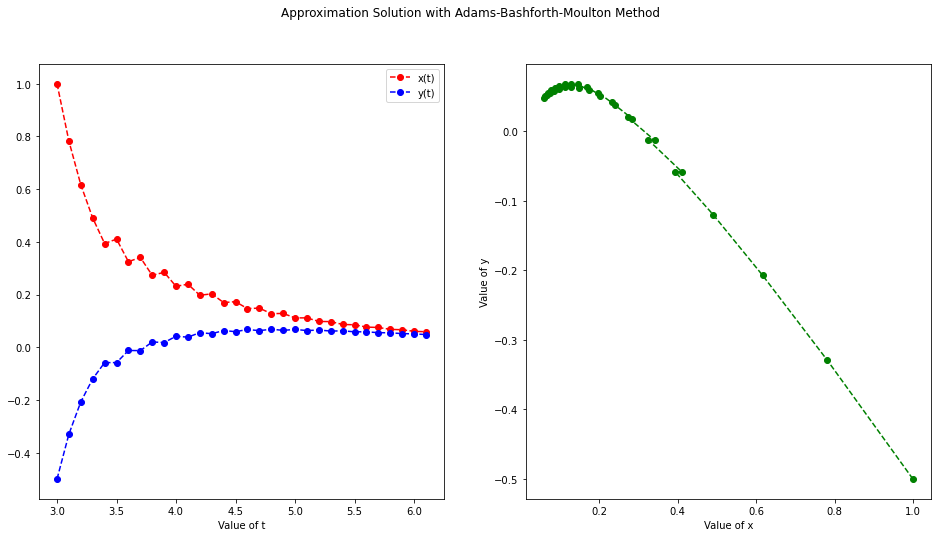

In [39]:
import numpy as np 
import matplotlib.pyplot as plt 

def f(x, y, z):
    return z - 2*y
    
def g(x, y, z):
    return -2*z + y
    
def AB_AM(x0, y0, z0, x, stepnum):
    h = (x-x0) / (stepnum - 1)
    xk =[x0]
    yk =[y0]
    zk =[z0]
    
    dubao_y = np.zeros([stepnum])
    dubao_z = np.zeros([stepnum])

    for i in range(4):
        dubao_y[i] = None
        dubao_z[i] = None
    
    for i in range(4):
        k1 = h*f(x0, y0 ,z0)
        l1 = h*g(x0, y0, z0)
        k2 = h*f(x0 + h/2, y0 + k1/2, z0 + l1/2)
        l2 = h*g(x0 + h/2, y0 + k1/2, z0 + l1/2)
        k3 = h*f(x0 + h/2, y0 + k2/2, z0 + l2/2)
        l3 = h*g(x0 + h/2, y0 + k2/2, z0 + l2/2)
        k4 = h*f(x0 + h, y0 + k3, z0 + l3)
        l4 = h*g(x0 + h, y0 + k3, z0 + l3 )
        y0 = y0 + 1/6*(k1 + 2*k2 + 2*k3 + k4)
        z0 = z0 + 1/6*(l1 + 2*l2 + 2*l3 + l4)
        x0 = x0 + h
        xk.append(x0)
        yk.append(y0)
        zk.append(z0)
        
    for i in range(4, stepnum):
        dubao_y[i] = h/24*(55*f(xk[i-1], yk[i-1], zk[i-1]) - 59*f(xk[i-2], yk[i-2], zk[i-2]) + 37*f(xk[i-3], yk[i-3], zk[i-3]) - 9*f(xk[i-4], yk[i-4], zk[i-4])) + yk[i-1]
        dubao_z[i] = h/24*(55*g(xk[i-1], yk[i-1], zk[i-1]) - 59*g(xk[i-2], yk[i-2], zk[i-2]) + 37*g(xk[i-3], yk[i-3], zk[i-3]) - 9*g(xk[i-4], yk[i-4], zk[i-4])) + zk[i-1]
    
        y0 = h/24*(9*f(xk[i], dubao_y[i], zk[i]) + 19*f(xk[i-1], yk[i-1], zk[i-1]) - 5*f(xk[i-2], yk[i-2], zk[i-2]) + f(xk[i-3], yk[i-3], zk[i-3])) + yk[i-1]
        z0 = h/24*(9*g(xk[i], dubao_z[i], zk[i]) + 19*g(xk[i-1], yk[i-1], zk[i-1]) - 5*g(xk[i-2], yk[i-2], zk[i-2]) + g(xk[i-3], yk[i-3], zk[i-3])) + zk[i-1]
        
        x0 = x0 + h
        xk.append(x0)
        yk.append(y0)
        zk.append(z0)
        
    print("x_n\t\t(Du bao cho x)\t\t(Hieu chinh cho x)\t\t(Du bao cho y)\t\t(Hieu chinh cho y)")
    for i in range(n):
        print(format(xk[i],'.1f'),"\t\t",format(dubao_z[i],'.8f'),"\t\t",format(zk[i],'.8f'),"\t\t",format(dubao_y[i],'.8f'),"\t\t",format(yk[i],'.8f'))
        
    fig = plt.figure(figsize = (16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(xk, zk, 'go--', c = 'r', label = 'x(t)')
    plt.plot(xk, yk, 'go--', c = 'b', label = 'y(t)')
    plt.xlabel("Value of t")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(zk, yk, 'go--', c = 'g')
    plt.xlabel("Value of x")
    plt.ylabel("Value of y")
    
    fig.suptitle("Approximation Solution with Adams-Bashforth-Moulton Method")
    plt.show()
 
if __name__ == '__main__': 
    t0 = 3
    x0 = 1
    y0 = -0.5 
    tf = 6
    n = 31
    AB_AM(t0, y0, x0, tf, n)
     